# 💻 Installation

PyCaret is tested and supported on the following 64-bit systems:
- Python 3.7 – 3.10
- Python 3.9 for Ubuntu only
- Ubuntu 16.04 or later
- Windows 7 or later

You can install PyCaret with Python's pip package manager:

`pip install pycaret`

PyCaret's default installation will not install all the extra dependencies automatically. For that you will have to install the full version:

`pip install pycaret[full]`

or depending on your use-case you may install one of the following variant:

- `pip install pycaret[analysis]`
- `pip install pycaret[models]`
- `pip install pycaret[tuner]`
- `pip install pycaret[mlops]`
- `pip install pycaret[parallel]`
- `pip install pycaret[test]`

In [3]:
!pip install pycaret

In [4]:
!pip install ucimlrepo

In [5]:
# check installed version
import pycaret
pycaret.__version__

'3.2.0'

In [6]:
from ucimlrepo import fetch_ucirepo

In [7]:
# fetch dataset
abalone = fetch_ucirepo(id=1)

# storing in dataframe
df = abalone.data.features

# dataframe shape
df.shape

(4177, 8)

### Setup
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `df` and `target`. All the other parameters are optional.

In [8]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(df, target = 'Sex', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(4177, 8)"
5,Transformed data shape,"(4177, 8)"
6,Transformed train set shape,"(2923, 8)"
7,Transformed test set shape,"(1254, 8)"
8,Numeric features,7
9,Preprocess,True


nce the setup has been successfully executed it shows the information grid containing experiment level information.

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Target type:**  Binary, Multiclass, or Regression. The Target type is automatically detected. <br/>
<br/>
- **Target Mapping:**  When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this tutorial, no label encoding is required since the target variable is of numeric type. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

We will stick to default one. No change in performance no matter what you use.

## Compare Models

This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [9]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5529,0.7492,0.5529,0.5439,0.5330,0.3242,0.3326,1.1400
lda,Linear Discriminant Analysis,0.5446,0.7453,0.5446,0.5371,0.5351,0.3131,0.3163,0.0360
ridge,Ridge Classifier,0.5436,0.0000,0.5436,0.5298,0.5244,0.3132,0.3203,0.0310
ada,Ada Boost Classifier,0.5426,0.7191,0.5426,0.5310,0.5208,0.3085,0.3169,0.2430
svm,SVM - Linear Kernel,0.5399,0.0000,0.5399,0.5082,0.4811,0.3034,0.3342,0.0480
gbc,Gradient Boosting Classifier,0.5334,0.7338,0.5334,0.5152,0.5177,0.2965,0.3001,1.2450
knn,K Neighbors Classifier,0.5330,0.7105,0.5330,0.5276,0.5272,0.3008,0.3025,0.0970
et,Extra Trees Classifier,0.5323,0.7355,0.5323,0.5209,0.5241,0.2969,0.2983,0.5400
lightgbm,Light Gradient Boosting Machine,0.5248,0.7238,0.5248,0.5151,0.5183,0.2850,0.2858,0.5500
qda,Quadratic Discriminant Analysis,0.5231,0.7316,0.5231,0.5114,0.4861,0.2805,0.2955,0.0340


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [10]:
best_recall_models_top3 = compare_models(sort = 'Recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5529,0.7492,0.5529,0.5439,0.5330,0.3242,0.3326,0.0680
lda,Linear Discriminant Analysis,0.5446,0.7453,0.5446,0.5371,0.5351,0.3131,0.3163,0.0350
ridge,Ridge Classifier,0.5436,0.0000,0.5436,0.5298,0.5244,0.3132,0.3203,0.0360
ada,Ada Boost Classifier,0.5426,0.7191,0.5426,0.5310,0.5208,0.3085,0.3169,0.1720
svm,SVM - Linear Kernel,0.5399,0.0000,0.5399,0.5082,0.4811,0.3034,0.3342,0.0840
gbc,Gradient Boosting Classifier,0.5334,0.7338,0.5334,0.5152,0.5177,0.2965,0.3001,1.4080
knn,K Neighbors Classifier,0.5330,0.7105,0.5330,0.5276,0.5272,0.3008,0.3025,0.0890
et,Extra Trees Classifier,0.5323,0.7355,0.5323,0.5209,0.5241,0.2969,0.2983,0.3520
lightgbm,Light Gradient Boosting Machine,0.5248,0.7238,0.5248,0.5151,0.5183,0.2850,0.2858,0.3850
qda,Quadratic Discriminant Analysis,0.5231,0.7316,0.5231,0.5114,0.4861,0.2805,0.2955,0.0340


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

## Analyze Model

You can use the `plot_model` function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

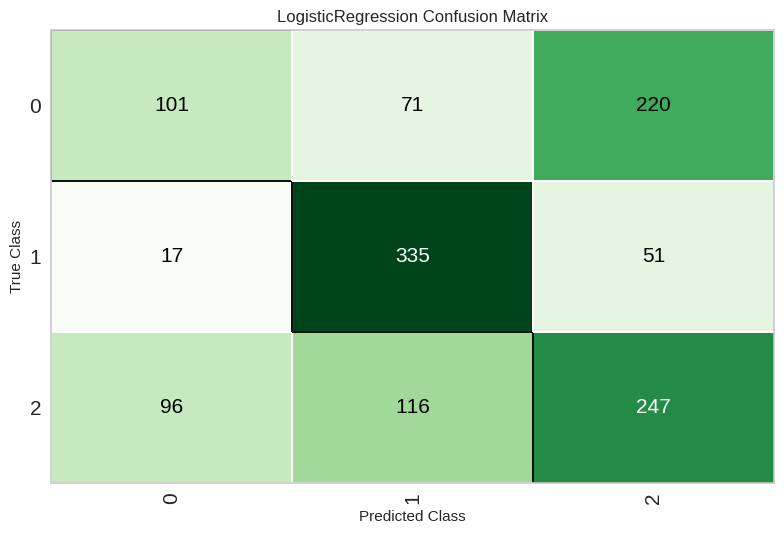

In [11]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

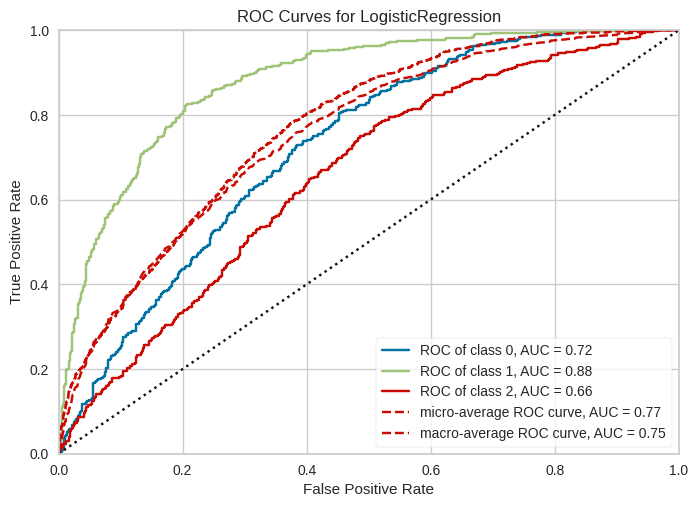

In [12]:
#plot AUC(Area Under Curve)
plot_model(best, plot = 'auc')

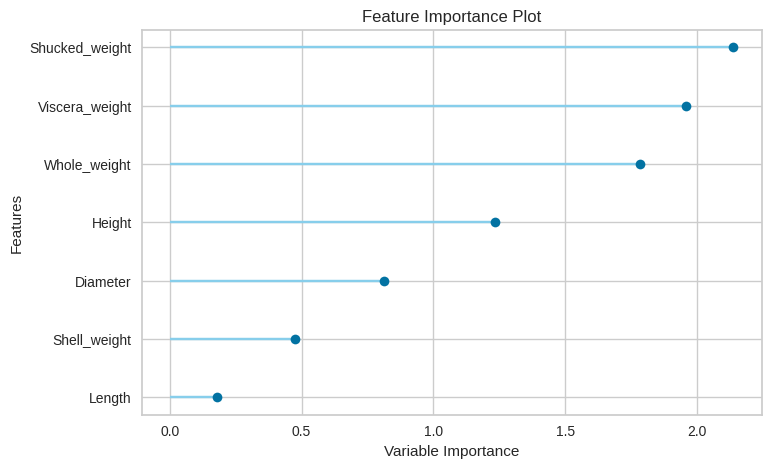

In [13]:
# plot feature importance
plot_model(best, plot = 'feature')

In [14]:
# check docstring to see available plots
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

In [15]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Prediction
The `predict_model` function returns `prediction_label` and `prediction_score` (probability of the predicted class) as new columns in dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [16]:
# copy data and drop Class variable

new_data = df.copy()
new_data.drop('Sex', axis=1, inplace=True)
new_data.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [17]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,prediction_label,prediction_score
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,I,0.5125
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,I,0.7460
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,M,0.3413
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,I,0.4720
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,I,0.7589


In [18]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Length', 'Diameter', 'Height',
                                              'Whole_weight', 'Shucked_weight',
                                              'Viscera_weight', 'Shell_weight'],
                                     transformer=SimpleImputer(add_indicator=False,...
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='most_frequent',
                                                               verbose='deprecated'))),
    

In [19]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Length', 'Diameter', 'Height',
                                             'Whole_weight', 'Shucked_weight',
                                             'Viscera_weight', 'Shell_weight'],
                                    transformer=SimpleImputer(add_indic...
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('trained_model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=123,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

## ✅ Tune Model

This function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [20]:
# tune hyperparameters of dt
lr = best
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5529,0.7390,0.5529,0.5400,0.5408,0.3282,0.3315
1,0.6075,0.7787,0.6075,0.6082,0.6000,0.4074,0.4120
2,0.5427,0.7525,0.5427,0.5331,0.5315,0.3097,0.3132
3,0.5582,0.7411,0.5582,0.5435,0.5300,0.3337,0.3459
4,0.5582,0.7466,0.5582,0.5450,0.5425,0.3321,0.3374
5,0.5308,0.7384,0.5308,0.5176,0.5179,0.2946,0.2980
6,0.5582,0.7558,0.5582,0.5481,0.5454,0.3331,0.3373
7,0.5685,0.7681,0.5685,0.5522,0.5506,0.3517,0.3579
8,0.5719,0.7464,0.5719,0.5640,0.5565,0.3538,0.3602


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [21]:
# model object
tuned_lr

LogisticRegression(C=6.718000000000001, class_weight={}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
# define tuning grid
lr_grid = {'C' : [6.71, 5.71, 4.71, 8.5, 9]}

# tune model with custom grid and metric = F1
tuned_lr = tune_model(tuned_lr, custom_grid = lr_grid, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5563,0.7390,0.5563,0.5441,0.5443,0.3332,0.3366
1,0.6075,0.7787,0.6075,0.6082,0.6000,0.4074,0.4120
2,0.5427,0.7526,0.5427,0.5331,0.5315,0.3097,0.3132
3,0.5582,0.7411,0.5582,0.5435,0.5300,0.3337,0.3459
4,0.5616,0.7466,0.5616,0.5490,0.5455,0.3371,0.3428
5,0.5308,0.7384,0.5308,0.5176,0.5179,0.2946,0.2980
6,0.5582,0.7557,0.5582,0.5481,0.5454,0.3331,0.3373
7,0.5685,0.7682,0.5685,0.5525,0.5505,0.3515,0.3578
8,0.5719,0.7464,0.5719,0.5640,0.5565,0.3538,0.3602


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [23]:
# to access the tuner object you can set return_tuner = True
tuned_lr, tuner = tune_model(tuned_lr, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5529,0.7390,0.5529,0.5400,0.5408,0.3282,0.3315
1,0.6075,0.7787,0.6075,0.6082,0.6000,0.4074,0.4120
2,0.5427,0.7525,0.5427,0.5331,0.5315,0.3097,0.3132
3,0.5582,0.7411,0.5582,0.5435,0.5300,0.3337,0.3459
4,0.5582,0.7466,0.5582,0.5450,0.5425,0.3321,0.3374
5,0.5308,0.7384,0.5308,0.5176,0.5179,0.2946,0.2980
6,0.5582,0.7558,0.5582,0.5481,0.5454,0.3331,0.3373
7,0.5685,0.7681,0.5685,0.5522,0.5506,0.3517,0.3579
8,0.5719,0.7464,0.5719,0.5640,0.5565,0.3538,0.3602


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [24]:
tuned_lr

LogisticRegression(C=6.71, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('label_encoding',
                                              TransformerWrapperWithInverse(exclude=None,
                                                                            include=None,
                                                                            transformer=LabelEncoder())),
                                             ('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['Length',
                                                                          'Diameter',
                                                                          'Height',
                                                                          'W...
                   param_distributions={'actual_estimator__C': [0.001, 0.002,
                                                                0.003, 0.004,
                                                                0.005, 0.006,
                                                                0.007, 0.008,
                                                                0.009, 0.01,
                                                                0.011, 0.012,
                                                                0.013, 0.014,
                                                                0.015, 0.016,
                                                                0.017, 0.018,
                                                                0.019, 0.02,
                                                                0.021, 0.022,
                                                                0.023, 0.024,
                                                                0.025, 0.026,
                                                                0.027, 0.028,
                                                                0.029, 0.03, ...],
                                        'actual_estimator__class_weight': ['balanced',
                                                                           {}]},
                   pre_dispatch='2*n_jobs', random_state=123, refit=False,
                   return_train_score=False, scoring='accuracy', verbose=1)

The default search algorithm is `RandomizedSearchCV` from `sklearn`. This can be changed by using `search_library` and `search_algorithm` parameter.

In [26]:
!pip install optuna

In [27]:
# use pip install pycaret[tuners] or pip install optuna
# tune lr using optuna
tuned_lr = tune_model(tuned_lr, search_library = 'scikit-learn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5529,0.7390,0.5529,0.5400,0.5408,0.3282,0.3315
1,0.6075,0.7787,0.6075,0.6082,0.6000,0.4074,0.4120
2,0.5427,0.7525,0.5427,0.5331,0.5315,0.3097,0.3132
3,0.5582,0.7411,0.5582,0.5435,0.5300,0.3337,0.3459
4,0.5582,0.7466,0.5582,0.5450,0.5425,0.3321,0.3374
5,0.5308,0.7384,0.5308,0.5176,0.5179,0.2946,0.2980
6,0.5582,0.7558,0.5582,0.5481,0.5454,0.3331,0.3373
7,0.5685,0.7681,0.5685,0.5522,0.5506,0.3517,0.3579
8,0.5719,0.7464,0.5719,0.5640,0.5565,0.3538,0.3602


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## ✅ Ensemble Model

This function ensembles a given estimator. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [28]:
# ensemble with bagging
ensemble_model(tuned_lr, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5563,0.7365,0.5563,0.5435,0.5448,0.3336,0.3365
1,0.6041,0.7789,0.6041,0.6048,0.5973,0.4021,0.4064
2,0.5358,0.7514,0.5358,0.5268,0.5262,0.2997,0.3025
3,0.5651,0.7417,0.5651,0.5536,0.5379,0.3441,0.3566
4,0.5616,0.7464,0.5616,0.5461,0.5411,0.3363,0.3438
5,0.5342,0.7382,0.5342,0.5199,0.5209,0.2999,0.3034
6,0.5548,0.7553,0.5548,0.5433,0.5360,0.3260,0.3332
7,0.5548,0.7682,0.5548,0.5357,0.5344,0.3305,0.3371
8,0.5685,0.7455,0.5685,0.5638,0.5511,0.3478,0.3559


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingClassifier(base_estimator='deprecated', bootstrap=True,
                  bootstrap_features=False,
                  estimator=LogisticRegression(C=6.71, class_weight={},
                                               dual=False, fit_intercept=True,
                                               intercept_scaling=1,
                                               l1_ratio=None, max_iter=1000,
                                               multi_class='auto', n_jobs=None,
                                               penalty='l2', random_state=123,
                                               solver='lbfgs', tol=0.0001,
                                               verbose=0, warm_start=False),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

In [29]:
# ensemble with bagging
ensemble_model(tuned_lr, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5666,0.7305,0.5666,0.5772,0.5493,0.3429,0.3541
1,0.5256,0.7516,0.5256,0.5212,0.5071,0.2797,0.2889
2,0.5256,0.7412,0.5256,0.5191,0.5145,0.2817,0.2863
3,0.5308,0.7203,0.5308,0.5151,0.5108,0.2921,0.2984
4,0.4897,0.7232,0.4897,0.4682,0.4666,0.2262,0.2324
5,0.4726,0.7201,0.4726,0.4517,0.4433,0.1991,0.2072
6,0.5411,0.7468,0.5411,0.5429,0.5279,0.3036,0.3112
7,0.5479,0.7445,0.5479,0.5343,0.5285,0.3171,0.3238
8,0.5308,0.7250,0.5308,0.5337,0.5116,0.2872,0.2980


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=LogisticRegression(C=6.71, class_weight={},
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=1000,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=123,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   learning_rate=1.0, n_estimators=10, random_state=123)

## ✅ Blend Models

This function trains a Soft Voting / Majority Rule classifier for select models passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [30]:
# top 3 models based on recall
best_recall_models_top3

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                            priors=None, shrinkage=None, solver='svd',
                            store_covariance=False, tol=0.0001),
 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, positive=False, random_state=123, solver='auto',
                 tol=0.0001)]

In [31]:
# blend top 3 models
blend_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5495,0.0000,0.5495,0.5382,0.5336,0.3211,0.3266
1,0.5836,0.0000,0.5836,0.5798,0.5746,0.3712,0.3754
2,0.5427,0.0000,0.5427,0.5335,0.5310,0.3098,0.3136
3,0.5719,0.0000,0.5719,0.5633,0.5476,0.3554,0.3677
4,0.5685,0.0000,0.5685,0.5594,0.5541,0.3488,0.3544
5,0.5137,0.0000,0.5137,0.4992,0.4992,0.2682,0.2719
6,0.5445,0.0000,0.5445,0.5325,0.5295,0.3121,0.3169
7,0.5548,0.0000,0.5548,0.5374,0.5358,0.3309,0.3372
8,0.5411,0.0000,0.5411,0.5305,0.5266,0.3071,0.3120


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=123,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('Linear Discriminant Analysis',
                              LinearDiscriminantAnalysis(covar...stimator=None,
                                                         n_components=None,
                                                         priors=None,
                                                         shrinkage=None,
                                                         solver='svd',
                                                         store_covariance=False,
                                                         tol=0.0001)),
                             ('Ridge Classifier',
                              RidgeClassifier(alpha=1.0, class_weight=None,
                                              copy_X=True, fit_intercept=True,
                                              max_iter=None, positive=False,
                                              random_state=123, solver='auto',
                                              tol=0.0001))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='hard', weights=None)

## ✅ Stack Models
This function trains a meta-model over select estimators passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [32]:
# stack models
stack_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5700,0.7400,0.5700,0.5606,0.5586,0.3515,0.3553
1,0.6041,0.7817,0.6041,0.6026,0.5996,0.4026,0.4050
2,0.5358,0.7521,0.5358,0.5277,0.5260,0.2991,0.3022
3,0.5685,0.7413,0.5685,0.5566,0.5499,0.3496,0.3570
4,0.5445,0.7452,0.5445,0.5302,0.5299,0.3112,0.3155
5,0.5342,0.7350,0.5342,0.5199,0.5233,0.2994,0.3015
6,0.5411,0.7513,0.5411,0.5348,0.5308,0.3054,0.3096
7,0.5548,0.7669,0.5548,0.5368,0.5393,0.3313,0.3352
8,0.5719,0.7455,0.5719,0.5691,0.5620,0.3524,0.3576


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingClassifier(cv=5,
                   estimators=[('Logistic Regression',
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=1000,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=123,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False)),
                               ('Linear Discriminant Analysis',
                                LinearDiscriminantAnalysi...
                                                random_state=123, solver='auto',
                                                tol=0.0001))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=123,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=True, stack_method='auto', verbose=0)

## ✅ Plot Model

This function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases.

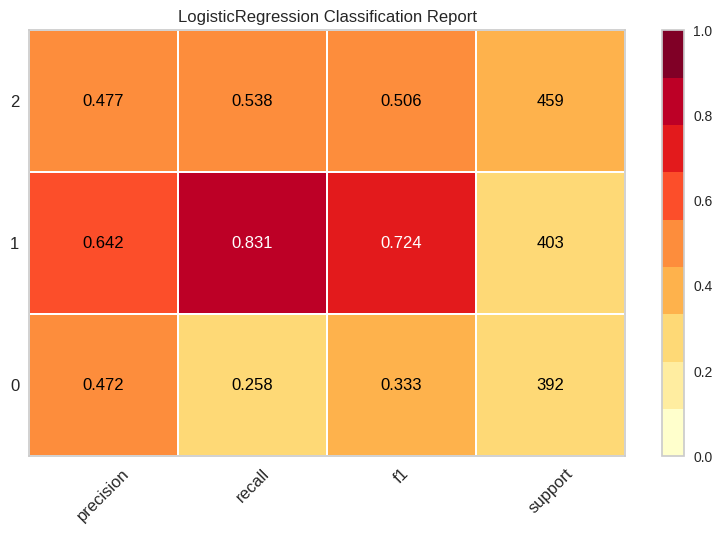

In [33]:
# plot class report
plot_model(best, plot = 'class_report')

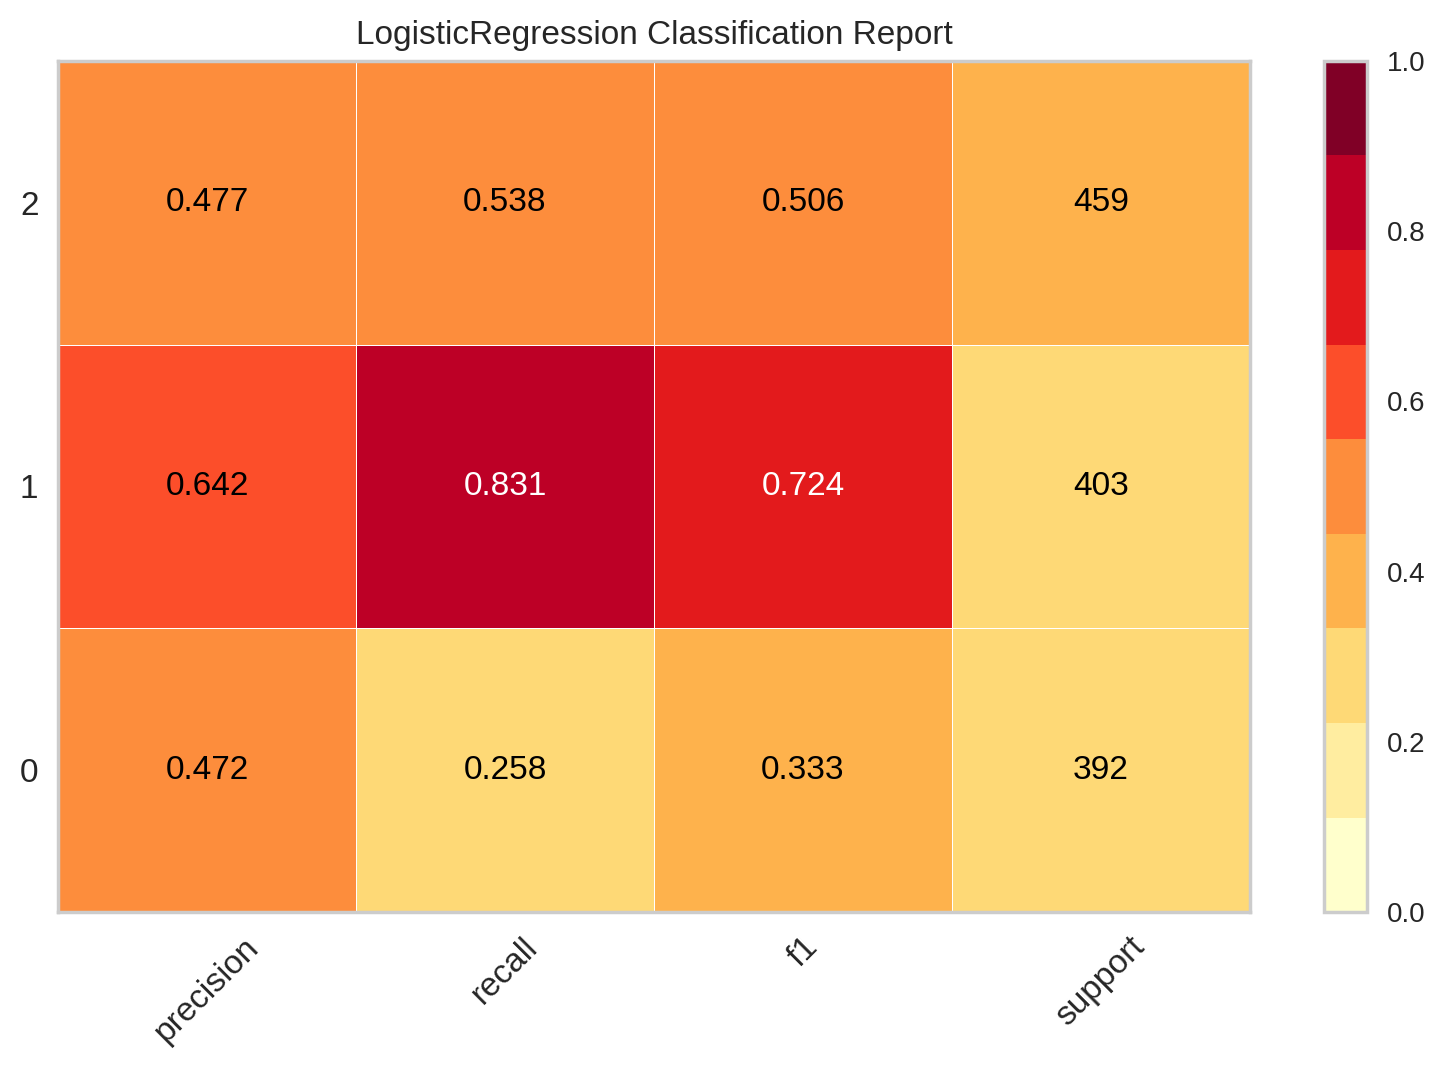

In [34]:
# to control the scale of plot
plot_model(best, plot = 'class_report', scale = 2)

In [35]:
# to save the plot
plot_model(best, plot = 'class_report', save=True)

'Class Report.png'

Some other parameters that you might find very useful in `plot_model` are:

- fit_kwargs
- plot_kwargs
- groups
- display_format

You can check the docstring of the function for more info.

## ✅ Interpret Model

This function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations). For more info on this, please see https://shap.readthedocs.io/en/latest/

In [45]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5154,0.7257,0.5154,0.5064,0.5087,0.2704,0.2715
1,0.5256,0.7409,0.5256,0.5188,0.5208,0.2856,0.2863
2,0.5290,0.7331,0.5290,0.5171,0.5222,0.2918,0.2923
3,0.5034,0.7018,0.5034,0.4857,0.4915,0.2529,0.2544
4,0.5411,0.7253,0.5411,0.5390,0.5391,0.3079,0.3085
5,0.5034,0.7151,0.5034,0.4901,0.4951,0.2545,0.2553
6,0.5377,0.7278,0.5377,0.5339,0.5351,0.3034,0.3038
7,0.5171,0.7196,0.5171,0.4998,0.5062,0.2744,0.2755
8,0.5240,0.7180,0.5240,0.5184,0.5207,0.2847,0.2849


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

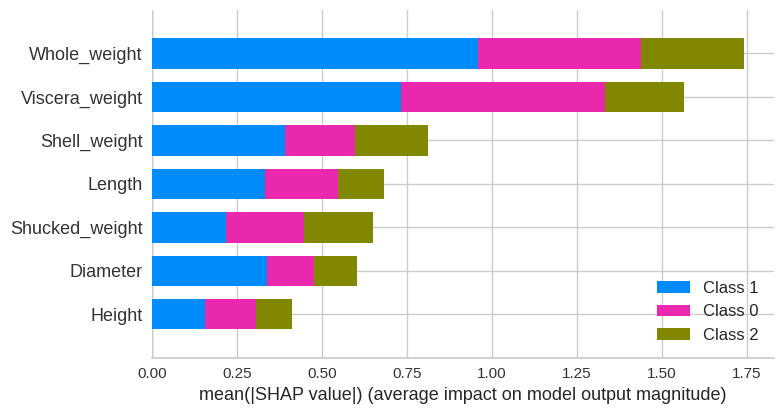

In [46]:
#pip install shap
# interpret summary model
interpret_model(lightgbm, plot="summary")

In [47]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

## ✅ Get Leaderboard

This function returns the leaderboard of all models trained in the current setup.

In [48]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/47 [00:00<?, ?it/s]

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Index,,,,,,,,,
0,Logistic Regression,"(TransformerWrapperWithInverse(exclude=None, i...",0.5529,0.7492,0.5529,0.5439,0.5330,0.3242,0.3326
1,K Neighbors Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.5330,0.7105,0.5330,0.5276,0.5272,0.3008,0.3025
2,Naive Bayes,"(TransformerWrapperWithInverse(exclude=None, i...",0.5101,0.7243,0.5101,0.4843,0.4727,0.2740,0.2880
3,Decision Tree Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.4735,0.6028,0.4735,0.4749,0.4734,0.2080,0.2083
4,SVM - Linear Kernel,"(TransformerWrapperWithInverse(exclude=None, i...",0.5399,0.0000,0.5399,0.5082,0.4811,0.3034,0.3342
5,Ridge Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.5436,0.0000,0.5436,0.5298,0.5244,0.3132,0.3203
6,Random Forest Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.5217,0.7277,0.5217,0.5091,0.5130,0.2807,0.2819
7,Quadratic Discriminant Analysis,"(TransformerWrapperWithInverse(exclude=None, i...",0.5231,0.7316,0.5231,0.5114,0.4861,0.2805,0.2955
8,Ada Boost Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.5426,0.7191,0.5426,0.5310,0.5208,0.3085,0.3169


In [49]:
# select the best model based on F1
lb.sort_values(by='F1', ascending=False)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Length', 'Diameter', 'Height',
                                             'Whole_weight', 'Shucked_weight',
                                             'Viscera_weight', 'Shell_weight'],
                                    transformer=SimpleImputer(add_indicator=False,...
                                                                 solver='auto',
                                                                 tol=0.0001))],
                                    final_estimator=LogisticRegression(C=1.0,
                                                                       class_weight=None,
                                                                       dual=False,
                                                                       fit_intercept=True,
                                                                       intercept_scaling=1,
                                                                       l1_ratio=None,
                                                                       max_iter=1000,
                                                                       multi_class='auto',
                                                                       n_jobs=None,
                                                                       penalty='l2',
                                                                       random_state=123,
                                                                       solver='lbfgs',
                                                                       tol=0.0001,
                                                                       verbose=0,
                                                                       warm_start=False),
                                    n_jobs=-1, passthrough=True,
                                    stack_method='auto', verbose=0)]],
         verbose=False)